In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration
RESULTS_FILE = 'predictions_trial_0.csv'
# Load the backtest results
try:
    results_df = pd.read_csv(RESULTS_FILE, index_col='timestamp', parse_dates=True)
    print(f"Successfully loaded data from {RESULTS_FILE}. Shape: {results_df.shape}")
except FileNotFoundError:
    print(f"Error: The file '{RESULTS_FILE}' was not found. Please ensure it has been generated by 'run_regression_backtest()'.")
    exit()

# Calculate error metrics
results_df['error'] = results_df['actual_close'] - results_df['mean']
results_df['absolute_error'] = np.abs(results_df['error'])
results_df['percentage_error'] = (results_df['error'] / results_df['actual_close']) * 100
results_df['absolute_percentage_error'] = np.abs(results_df['percentage_error'])

print("\nError Statistics:")
print(results_df[['error', 'absolute_error', 'percentage_error', 'absolute_percentage_error']].describe())

Successfully loaded data from predictions_trial_0.csv. Shape: (6367, 12)

Error Statistics:
             error  absolute_error  percentage_error  \
count  6367.000000     6367.000000       6367.000000   
mean     -9.746228      348.674596         -0.011956   
std     513.248904      376.731164          0.628032   
min   -4355.598437        0.066875         -5.092835   
25%    -240.929531      110.028125         -0.308153   
50%      -8.241250      238.809531         -0.010702   
75%     236.708750      450.706875          0.303316   
max    4708.502500     4708.502500          5.091534   

       absolute_percentage_error  
count                6367.000000  
mean                    0.433725  
std                     0.454335  
min                     0.000074  
25%                     0.143370  
50%                     0.305087  
75%                     0.566862  
max                     5.092835  



--- Model Comparison Statistics ---
                                         error  absolute_error  \
model                   statistic                                
predictions_trial_0.csv count      6367.000000     6367.000000   
                        mean         -9.746228      348.674596   
                        std         513.248904      376.731164   
                        min       -4355.598437        0.066875   
                        25%        -240.929531      110.028125   
                        50%          -8.241250      238.809531   
                        75%         236.708750      450.706875   
                        max        4708.502500     4708.502500   

                                   percentage_error  absolute_percentage_error  
model                   statistic                                               
predictions_trial_0.csv count           6367.000000                6367.000000  
                        mean              -0.011956        

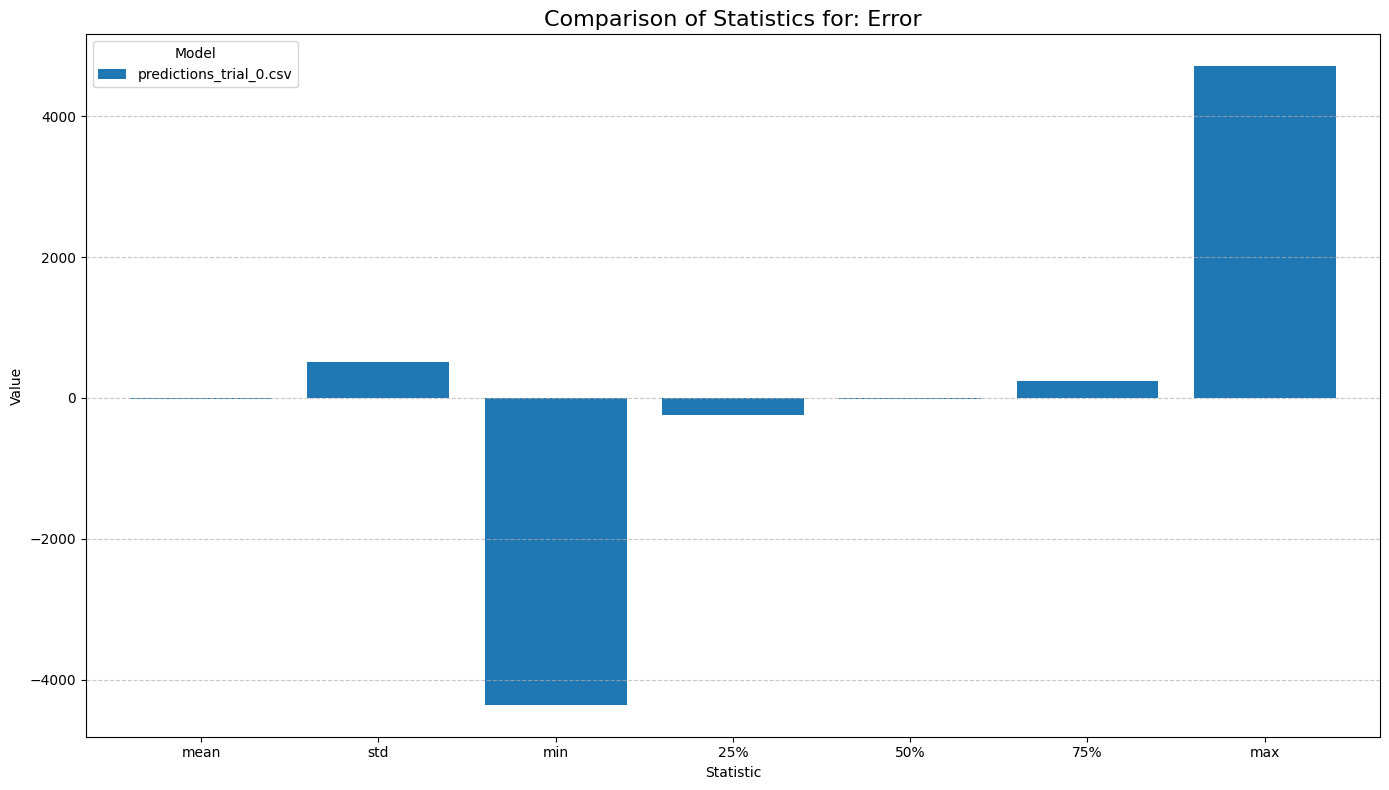

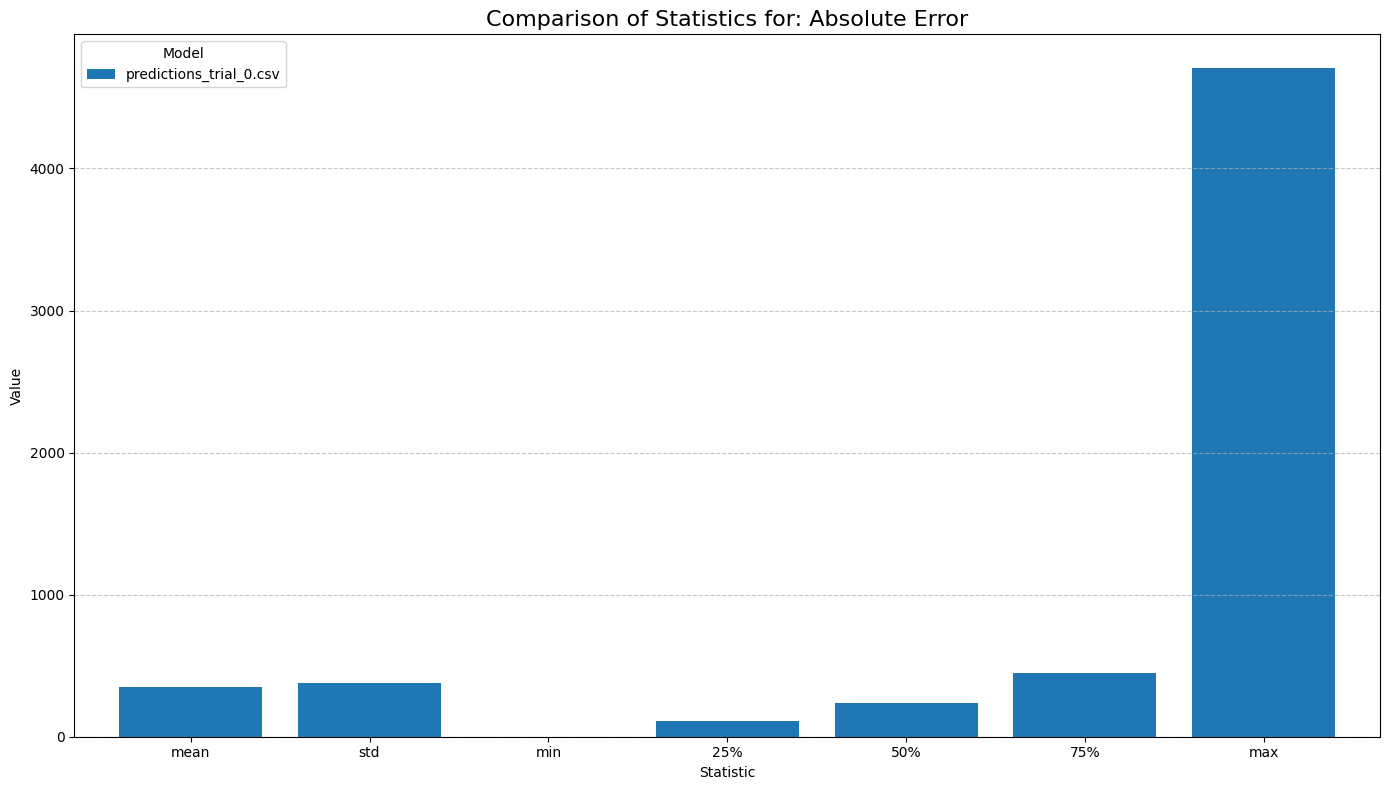

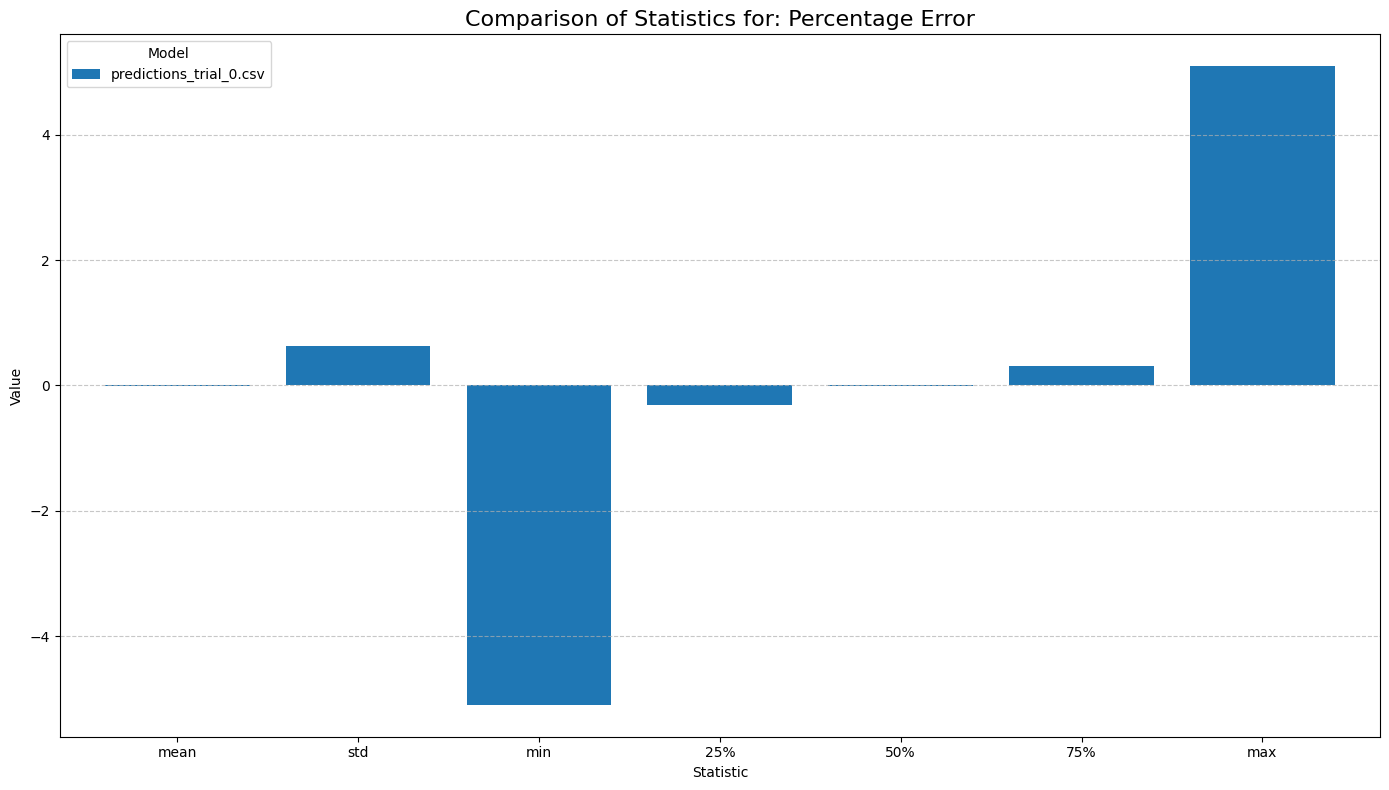

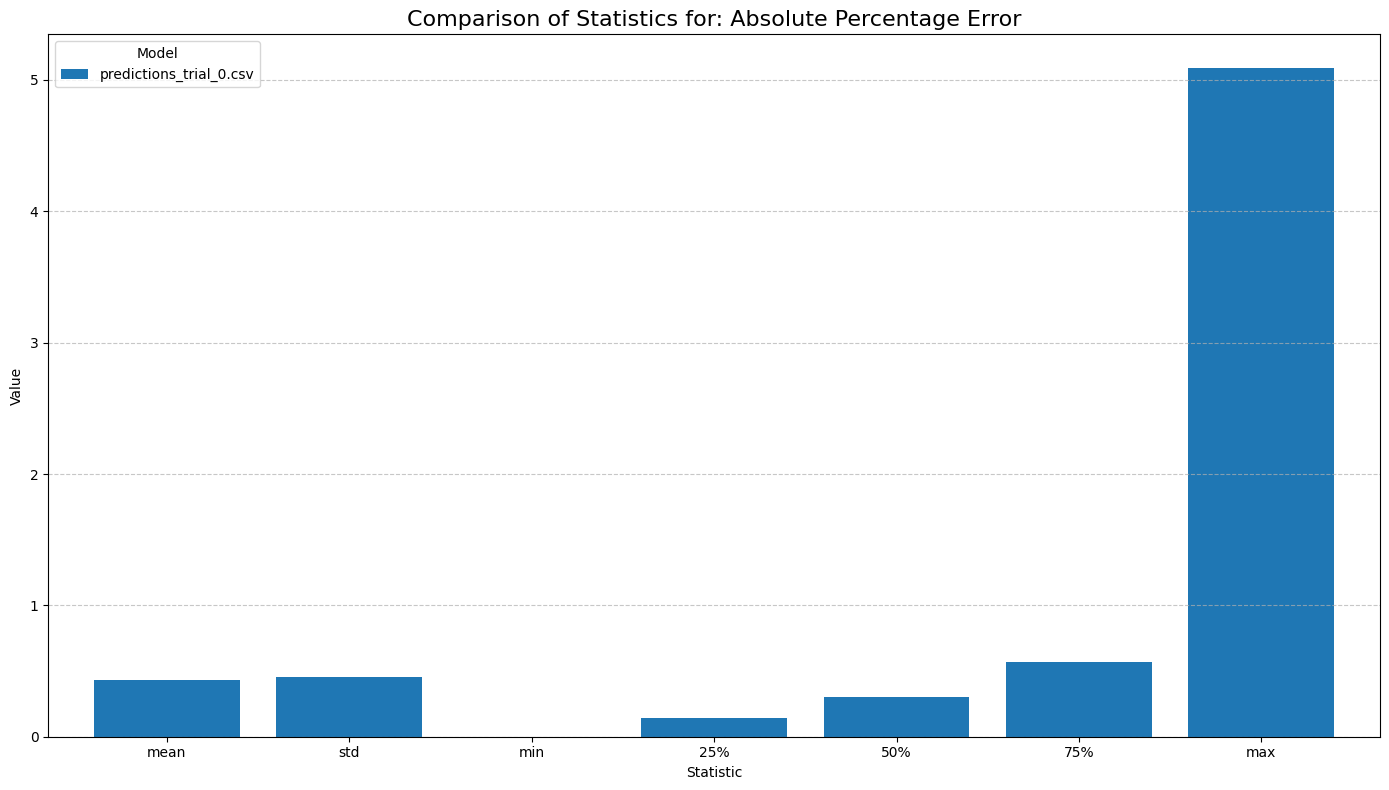


--- Model Comparison (Summary Metrics) ---
                                MAE      MAPE        RMSE      MASE
model                                                              
predictions_trial_0.csv  348.674596  0.433725  513.301133  1.161571


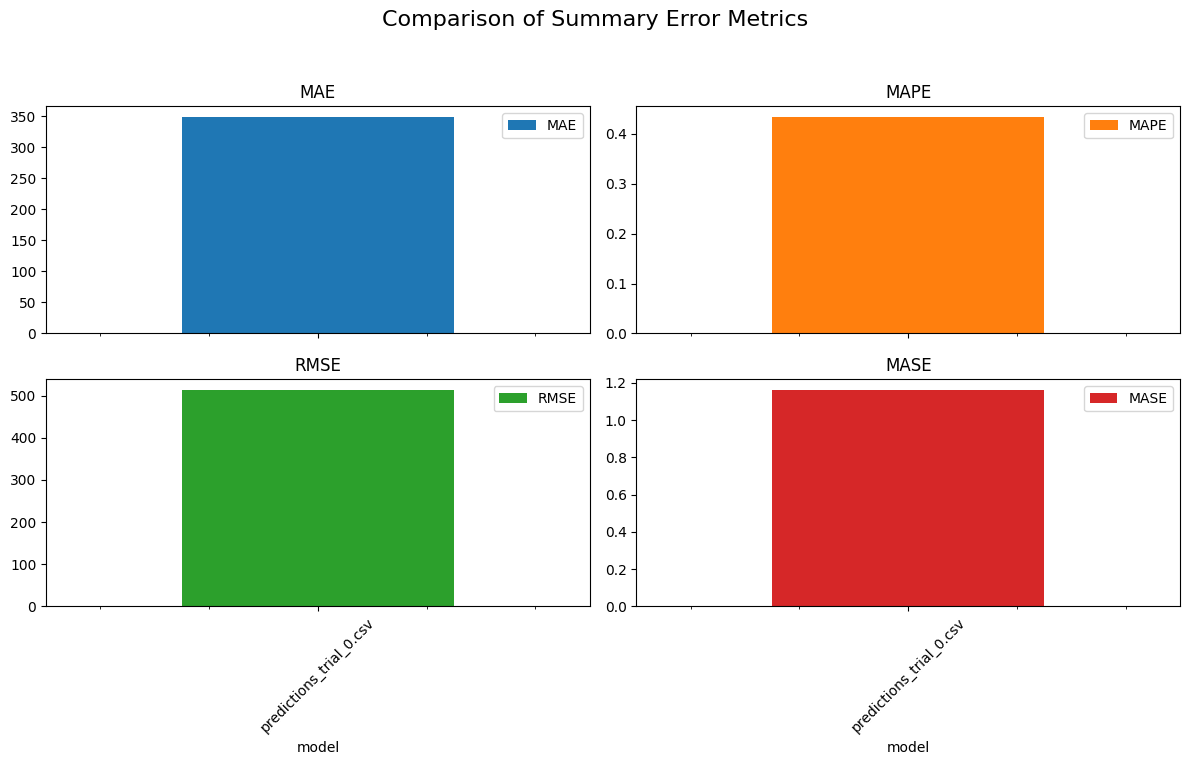

In [147]:
# --- Comparison of multiple backtest results ---


RESULTS_FILES = [
    'predictions_trial_0.csv'
]

all_stats_list = []
summary_metrics = []
for file in RESULTS_FILES:
    try:
        df = pd.read_csv(file, index_col='timestamp', parse_dates=True)
        # Create a more readable model name from the filename
        model_name = file.replace('_backtest_results.csv', '').replace('regression_', '')

        # Calculate error metrics
        df['error'] = df['actual_close'] - df['mean']
        df['absolute_error'] = np.abs(df['error'])
        df['percentage_error'] = (df['error'] / df['actual_close']) * 100
        df['absolute_percentage_error'] = np.abs(df['percentage_error'])

        # Get summary statistics
        stats = df[['error', 'absolute_error', 'percentage_error', 'absolute_percentage_error']].describe()
        stats['model'] = model_name
        all_stats_list.append(stats)

        # Calculate summary metrics like MAE, RMSE, MASE
        mae = df['absolute_error'].mean()
        mape = df['absolute_percentage_error'].mean()
        rmse = np.sqrt((df['error']**2).mean())
        mae_naive = np.abs(df['actual_close'].diff()).mean()
        mase = mae / mae_naive if mae_naive != 0 else np.inf

        summary_metrics.append({
            'model': model_name,
            'MAE': mae,
            'MAPE': mape,
            'RMSE': rmse,
            'MASE': mase,
        })
        
    except FileNotFoundError:
        print(f"\nWarning: The file '{file}' was not found. Skipping comparison for this file.")

if all_stats_list:
    # Prepare dataframe for plotting
    comparison_df = pd.concat(all_stats_list)
    comparison_df = comparison_df.reset_index().rename(columns={'index': 'statistic'})
    comparison_df = comparison_df.set_index(['model', 'statistic'])

    print("\n--- Model Comparison Statistics ---")
    print(comparison_df)

    # Plotting
    metrics_to_plot = ['error', 'absolute_error', 'percentage_error', 'absolute_percentage_error']
    stats_to_plot = ['mean', 'std', 'min', '25%', '50%', '75%', 'max']

    for metric in metrics_to_plot:
        # Select data for the current metric and stats to plot
        # Using .loc to avoid potential KeyError if a stat is missing, though describe() is consistent
        plot_data = comparison_df[metric].unstack(level='model').loc[stats_to_plot]

        # Plotting the comparison
        plot_data.plot(kind='bar', figsize=(14, 8), rot=0, width=0.8)
        plt.title(f'Comparison of Statistics for: {metric.replace("_", " ").title()}', fontsize=16)
        plt.xlabel('Statistic')
        plt.ylabel('Value')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.legend(title='Model')
        plt.tight_layout()
        plt.show()

if summary_metrics:
    summary_df = pd.DataFrame(summary_metrics).set_index('model')
    print("\n--- Model Comparison (Summary Metrics) ---")
    print(summary_df)

    # Plotting
    summary_df.plot(kind='bar', figsize=(12, 8), subplots=True, layout=(2, 2), sharey=False, rot=45)
    plt.suptitle('Comparison of Summary Error Metrics', fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


--- Detailed Analysis for: predictions_trial_0.csv ---


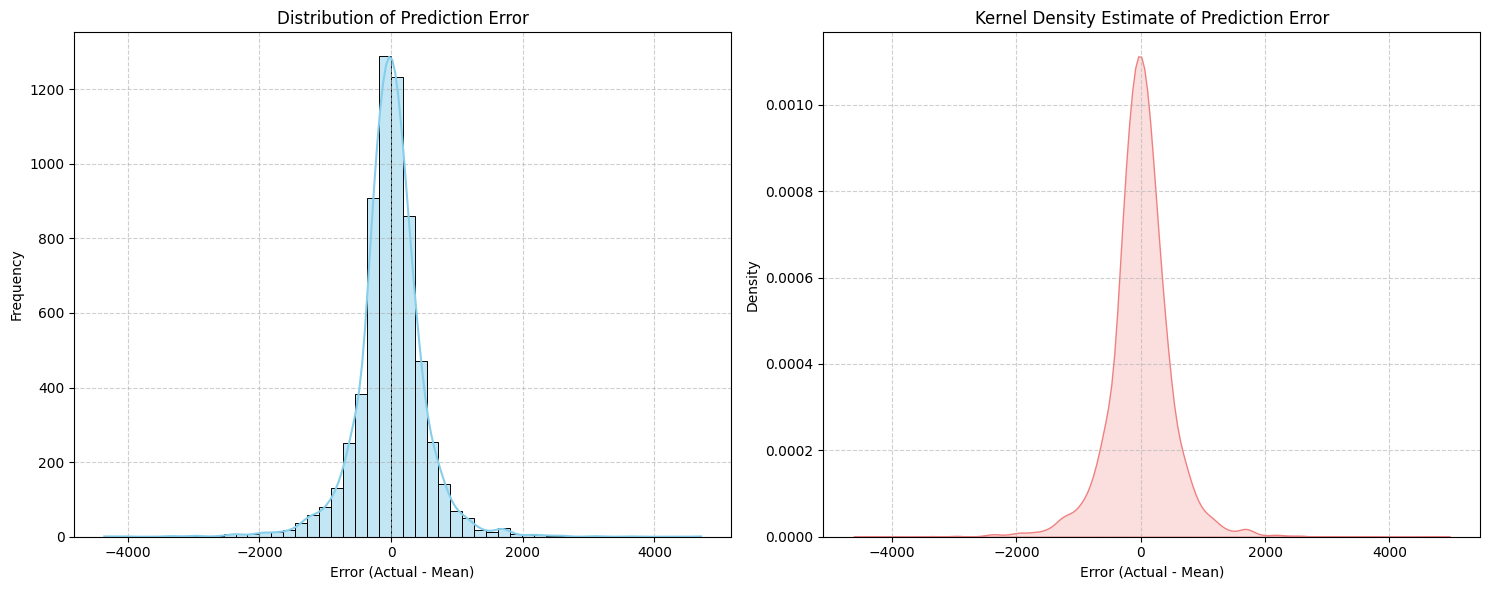

In [148]:
# --- Detailed analysis of primary file continues below ---
print(f"\n--- Detailed Analysis for: {RESULTS_FILE} ---")

# 1. Analyze the distribution of the error
plt.figure(figsize=(15, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(results_df['error'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prediction Error')
plt.xlabel('Error (Actual - Mean)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(results_df['error'], fill=True, color='lightcoral')
plt.title('Kernel Density Estimate of Prediction Error')
plt.xlabel('Error (Actual - Mean)')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

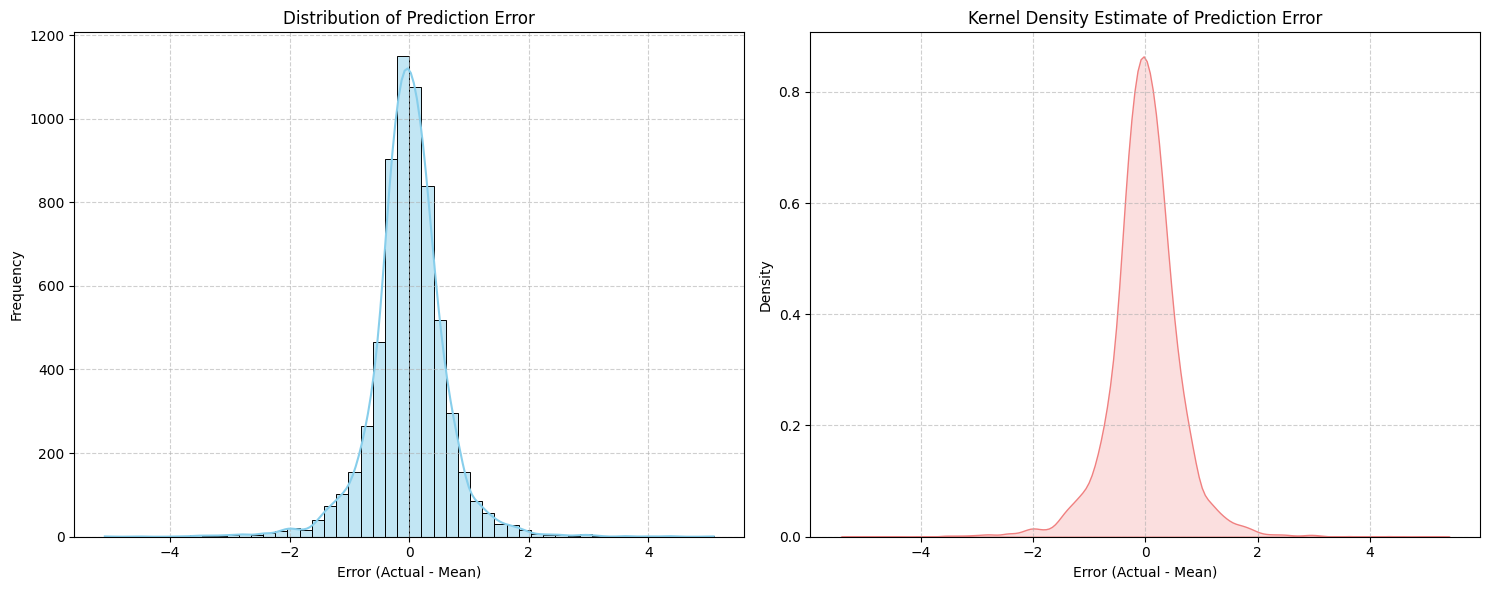

In [149]:
plt.figure(figsize=(15, 6))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(results_df['percentage_error'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prediction Error')
plt.xlabel('Error (Actual - Mean)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(results_df['percentage_error'], fill=True, color='lightcoral')
plt.title('Kernel Density Estimate of Prediction Error')
plt.xlabel('Error (Actual - Mean)')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

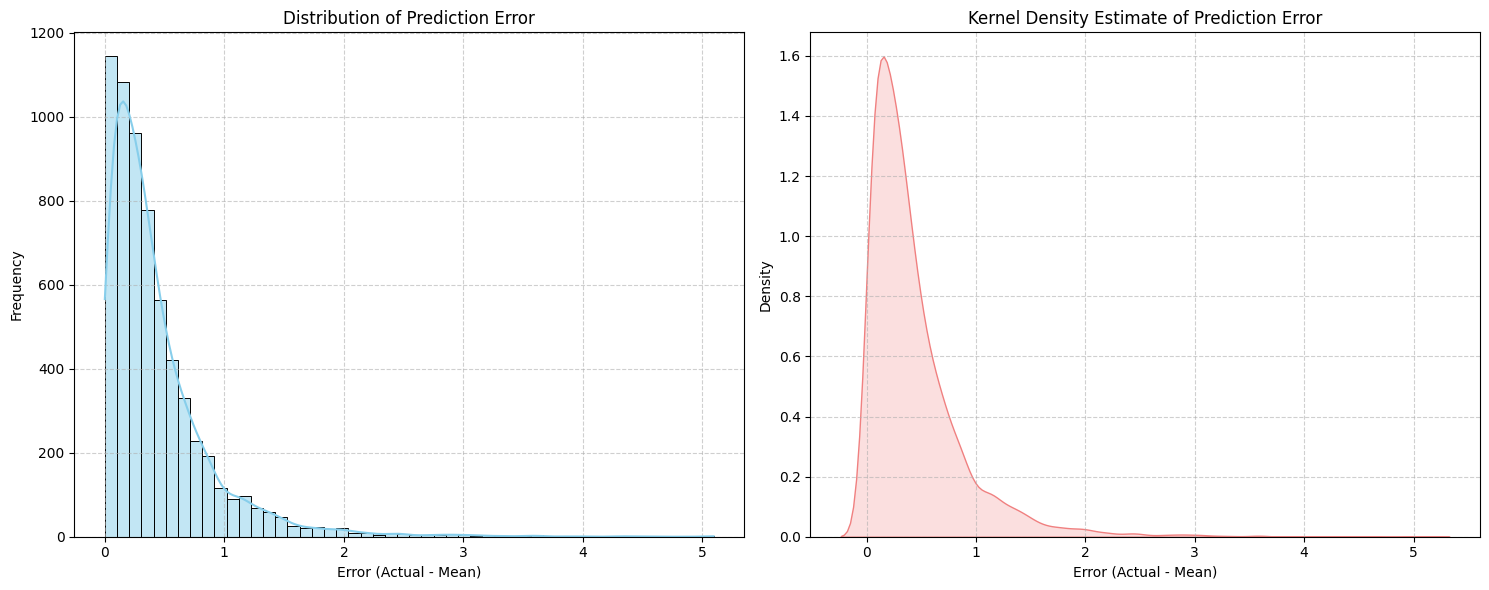

In [150]:
plt.figure(figsize=(15, 6))
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(results_df['absolute_percentage_error'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prediction Error')
plt.xlabel('Error (Actual - Mean)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

# KDE Plot
plt.subplot(1, 2, 2)
sns.kdeplot(results_df['absolute_percentage_error'], fill=True, color='lightcoral')
plt.title('Kernel Density Estimate of Prediction Error')
plt.xlabel('Error (Actual - Mean)')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

/tmp/ipykernel_2690460/2133112654.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Days Since Refit')


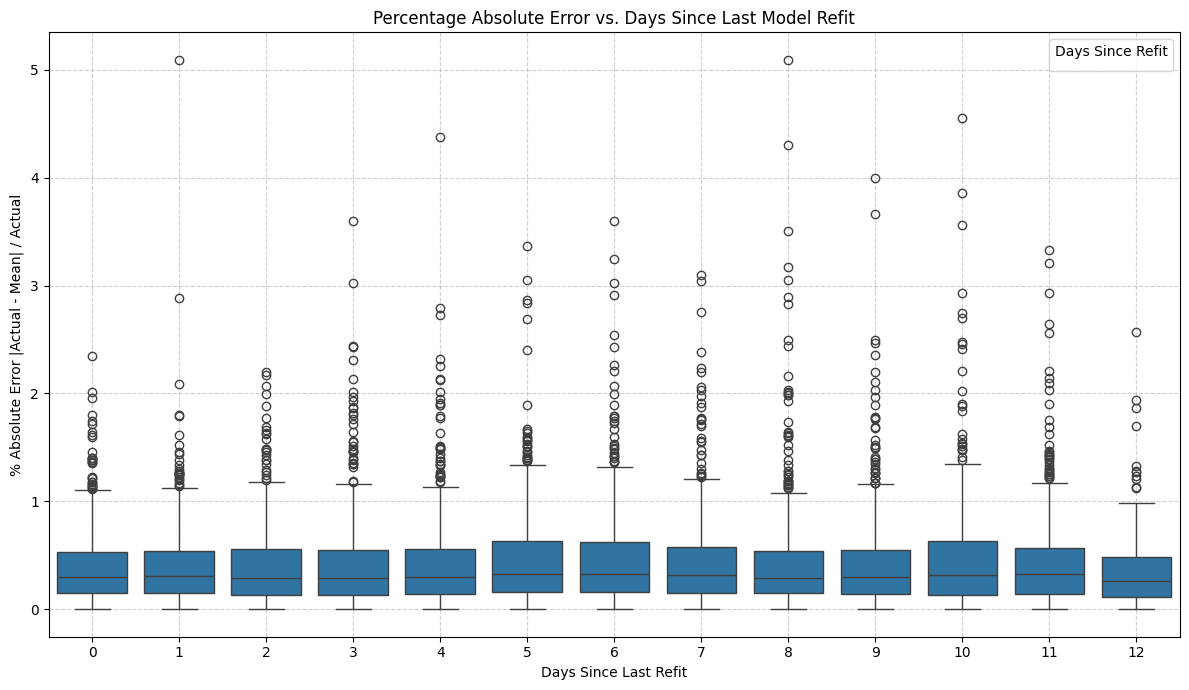

In [151]:
# 2. Plot the relationship between the absolute value of the error and the amount of periods since last refit
# Convert periods_since_refit to days (assuming hourly data, 24 periods per day)
results_df['days_since_refit'] = results_df['hours_since_last_refit'] / 24
results_df['days_since_refit'] = results_df['days_since_refit'].astype(int)
plt.figure(figsize=(12, 7))
sns.boxplot(
    data=results_df,
    x='days_since_refit',
    y='absolute_percentage_error',
)

plt.title('Percentage Absolute Error vs. Days Since Last Model Refit')
plt.xlabel('Days Since Last Refit')
plt.ylabel('% Absolute Error |Actual - Mean| / Actual')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Days Since Refit')
plt.tight_layout()
plt.show()

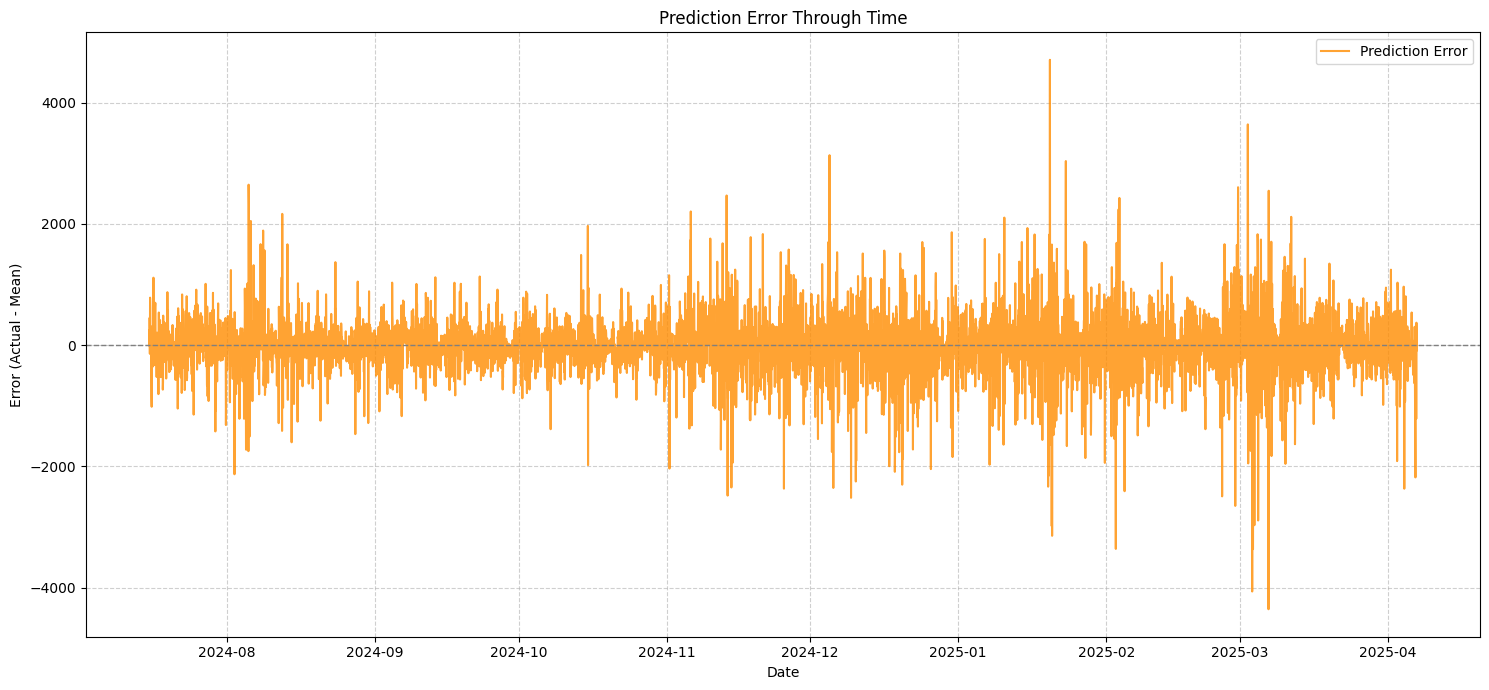

In [152]:
# 3. Plot the error through time
plt.figure(figsize=(15, 7))
plt.plot(results_df.index, results_df['error'], label='Prediction Error', color='darkorange', alpha=0.8)
plt.axhline(0, color='gray', linestyle='--', linewidth=1) # Zero error line
plt.title('Prediction Error Through Time')
plt.xlabel('Date')
plt.ylabel('Error (Actual - Mean)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

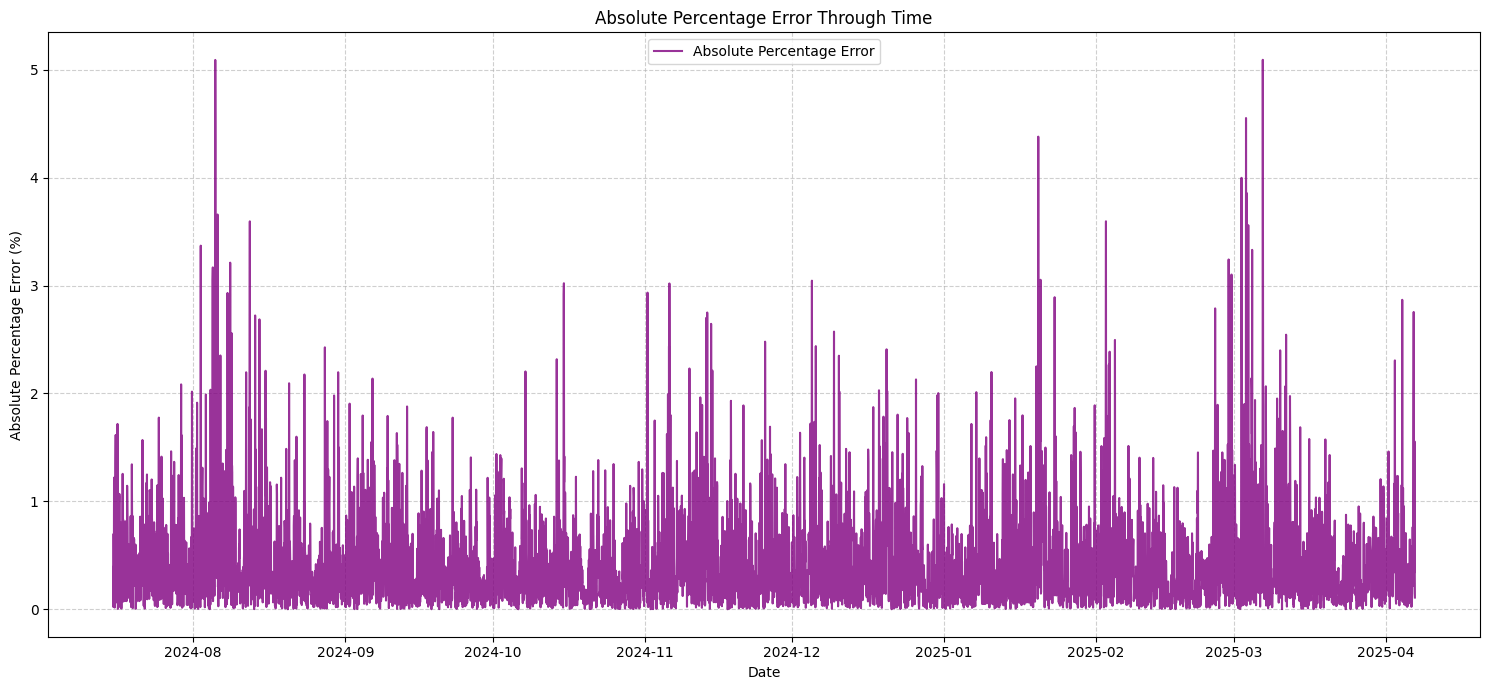

In [153]:
# Optional: Plot absolute percentage error through time
plt.figure(figsize=(15, 7))
plt.plot(results_df.index, results_df['absolute_percentage_error'], label='Absolute Percentage Error', color='purple', alpha=0.8)
plt.title('Absolute Percentage Error Through Time')
plt.xlabel('Date')
plt.ylabel('Absolute Percentage Error (%)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

Successfully loaded data from predictions_trial_0.csv. Shape: (6367, 12)


/tmp/ipykernel_2690460/1710538155.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mape_df, x='Prediction', y='MAPE', palette='viridis')


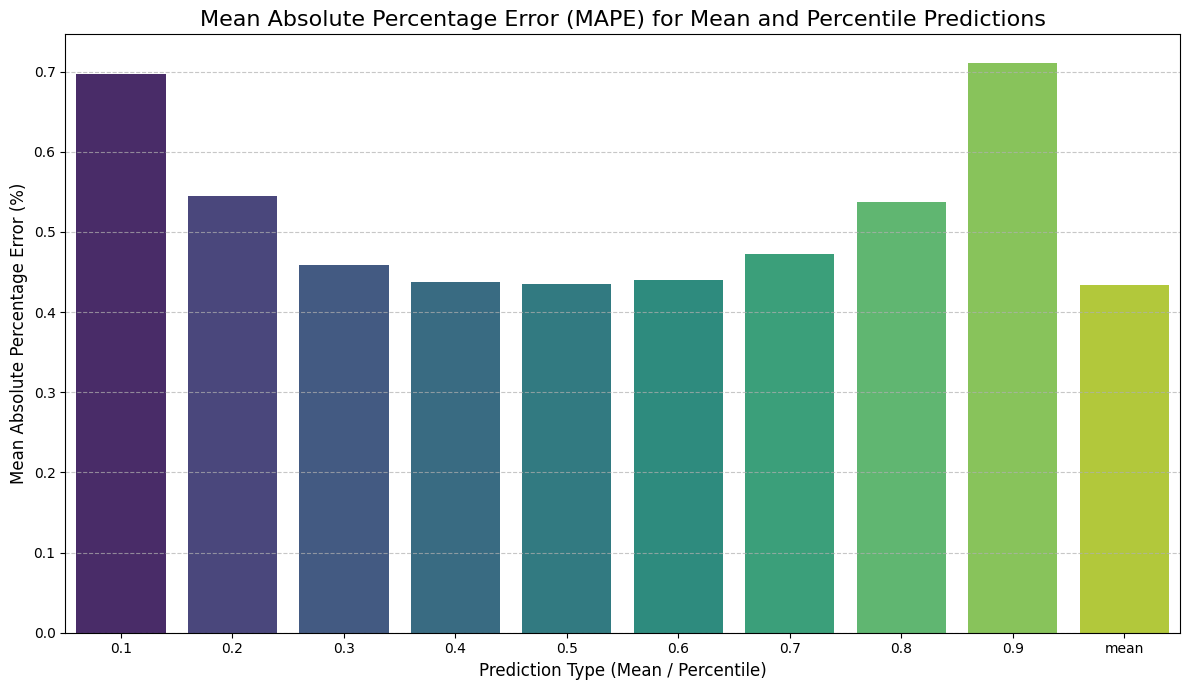

In [154]:
# 4. Compare MAPE of mean vs percentile predictions
# Configuration
RESULTS_FILE = 'predictions_trial_0.csv'
# Load the backtest results
try:
    results_df = pd.read_csv(RESULTS_FILE, index_col='timestamp', parse_dates=True)
    print(f"Successfully loaded data from {RESULTS_FILE}. Shape: {results_df.shape}")
except FileNotFoundError:
    print(f"Error: The file '{RESULTS_FILE}' was not found. Please ensure it has been generated by 'run_regression_backtest()'.")
    exit()

# Calculate error metrics
results_df['error'] = results_df['actual_close'] - results_df['mean']
results_df['absolute_error'] = np.abs(results_df['error'])
results_df['percentage_error'] = (results_df['error'] / results_df['actual_close']) * 100
results_df['absolute_percentage_error'] = np.abs(results_df['percentage_error'])

prediction_cols = ['mean'] + [f'{q:.1f}' for q in np.arange(0.1, 1.0, 0.1)]
# Filter for columns that actually exist in the dataframe
prediction_cols = [col for col in prediction_cols if col in results_df.columns]

if prediction_cols:
    mape_scores = {}
    for col in prediction_cols:
        # Calculate Absolute Percentage Error for the column
        ape = np.abs((results_df['actual_close'] - results_df[col]) / results_df['actual_close']) * 100
        mape_scores[col] = ape.mean()

    # Create a DataFrame for plotting
    mape_df = pd.DataFrame(list(mape_scores.items()), columns=['Prediction', 'MAPE']).sort_values('Prediction')

    # Plotting
    plt.figure(figsize=(12, 7))
    sns.barplot(data=mape_df, x='Prediction', y='MAPE', palette='viridis')
    plt.title('Mean Absolute Percentage Error (MAPE) for Mean and Percentile Predictions', fontsize=16)
    plt.xlabel('Prediction Type (Mean / Percentile)', fontsize=12)
    plt.ylabel('Mean Absolute Percentage Error (%)', fontsize=12)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

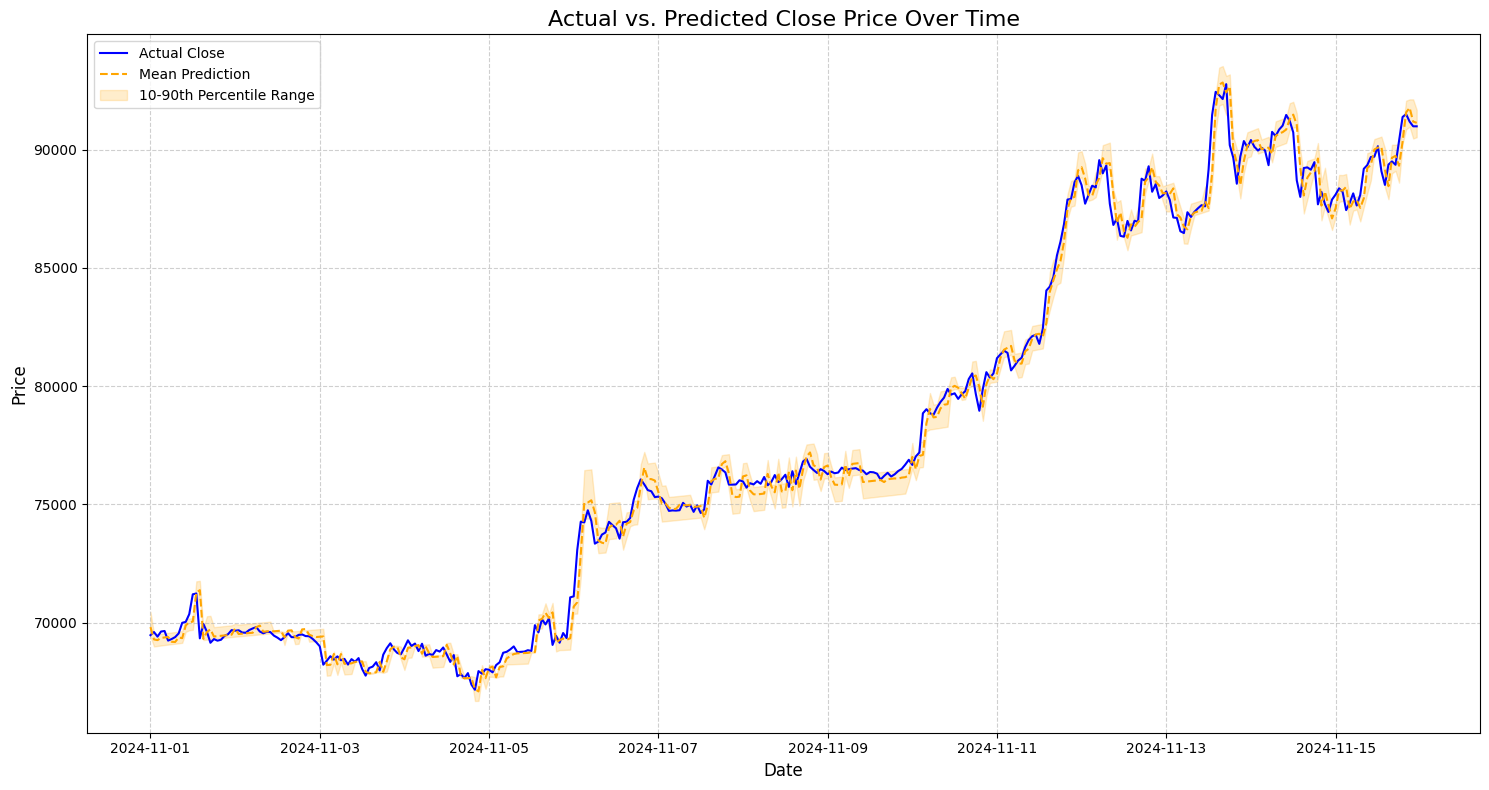

In [167]:
# 5. Plot actual vs. predicted values over time
plt.figure(figsize=(15, 8))
df = results_df['2024-11-1':'2024-11-15']
# Plot actual closing price
plt.plot(df.index, df['actual_close'], label='Actual Close', color='blue', linewidth=1.5)

# Plot mean prediction
plt.plot(df.index, df['mean'], label='Mean Prediction', color='orange', linestyle='--', linewidth=1.5)

# Plot prediction intervals (e.g., 10th to 90th percentile)
if '0.1' in df.columns and '0.9' in df.columns:
    plt.fill_between(df.index, df['0.1'], df['0.9'], color='orange', alpha=0.2, label='10-90th Percentile Range')

plt.title('Actual vs. Predicted Close Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

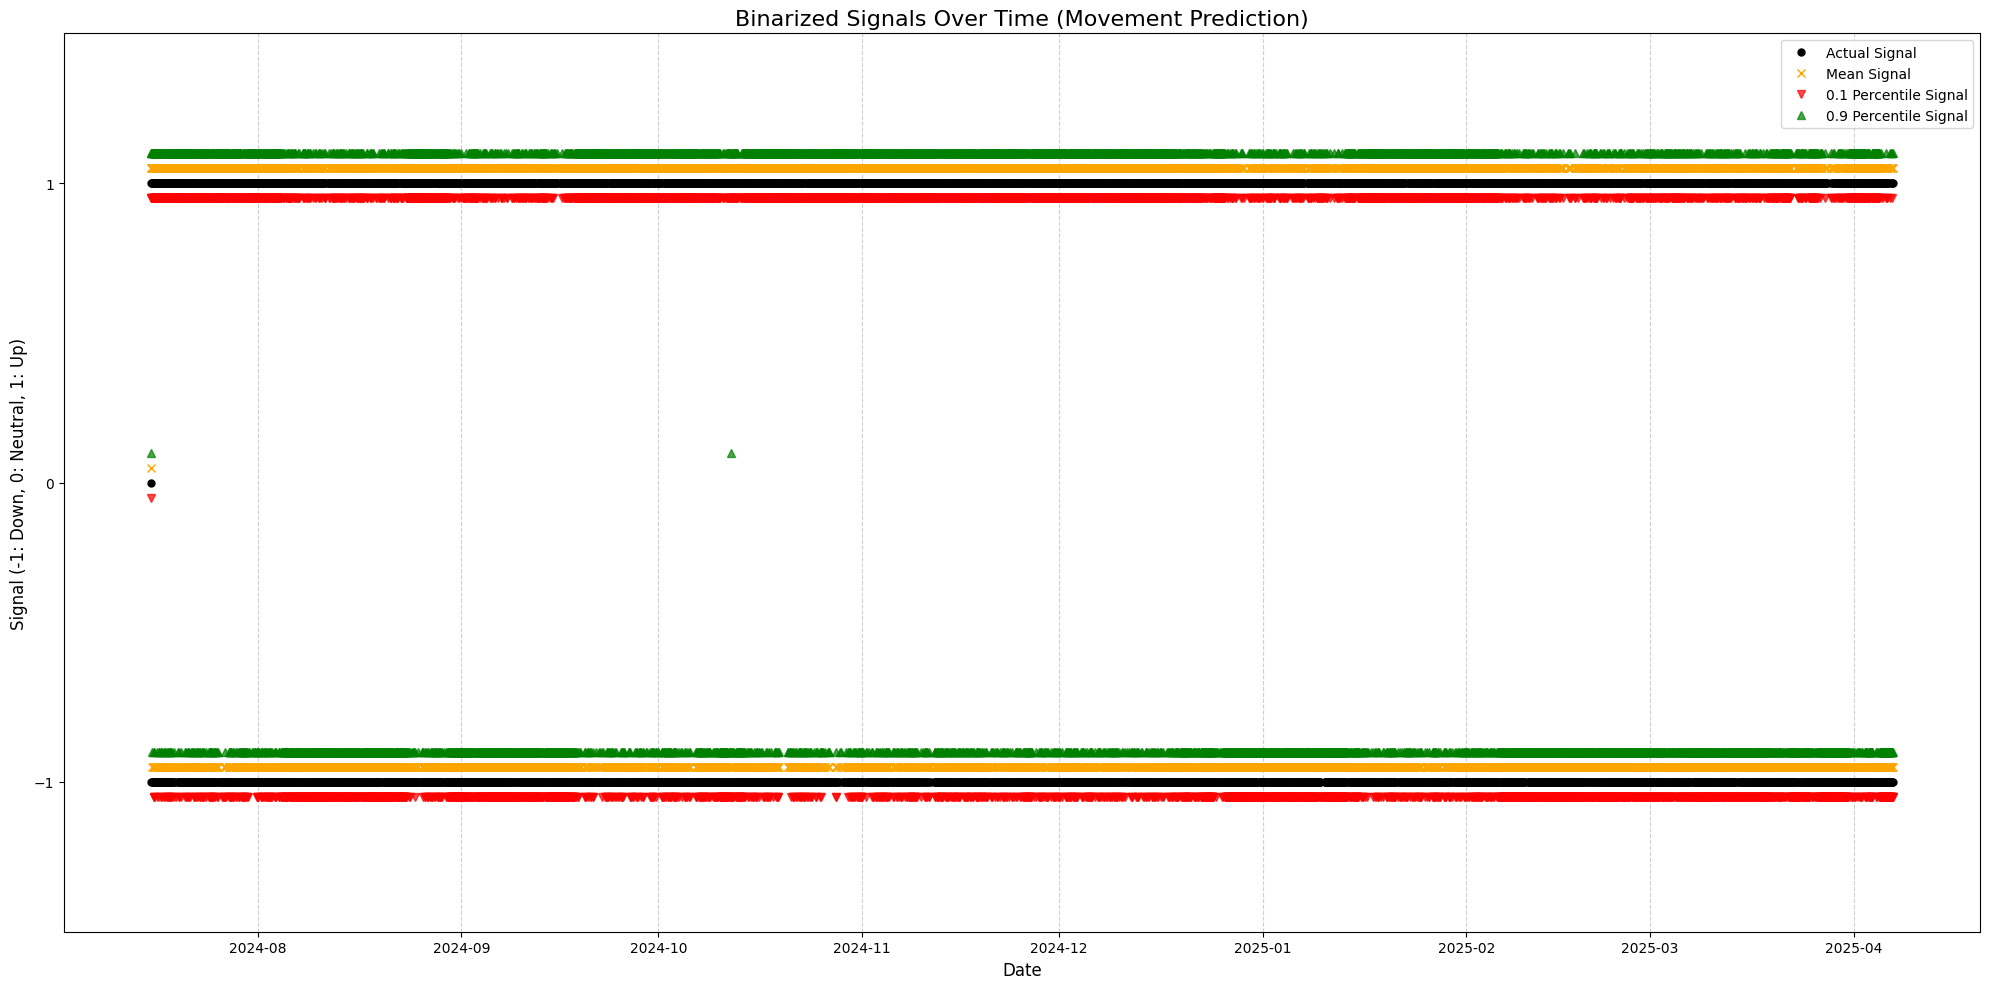


--- Classification Report for Mean Prediction Signal ---
Threshold for Up/Down signal: +/- 0.00%
              precision    recall  f1-score   support

        Down       0.47      0.46      0.46      3126
     Neutral       1.00      1.00      1.00         1
          Up       0.49      0.50      0.49      3240

    accuracy                           0.48      6367
   macro avg       0.65      0.65      0.65      6367
weighted avg       0.48      0.48      0.48      6367



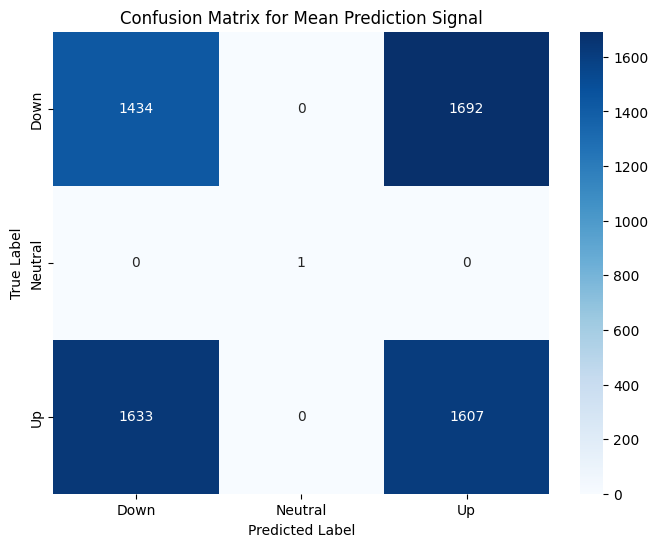

In [171]:
# 6. Binarize signals and evaluate classification performance
from sklearn.metrics import classification_report, confusion_matrix

binarization_threshold = 0 / 100  # 0.57%

# Columns to binarize
cols_to_binarize = ['actual_close'] + [col for col in prediction_cols if col in results_df.columns]

# Calculate percentage change for each column
pct_change_df = results_df[cols_to_binarize].pct_change()

# Define the binarization function
def binarize_signal(series, threshold):
    return np.select(
        [series > threshold, series < -threshold],
        [1, -1],
        default=0
    )

# Apply binarization
binarized_df = pct_change_df.apply(lambda x: binarize_signal(x, threshold=binarization_threshold))
binarized_df.dropna(inplace=True) # Drop first row with NaN from pct_change

# --- Plot binarized time series ---
plt.figure(figsize=(20, 10))
plt.plot(binarized_df.index, binarized_df['actual_close'], 
         label='Actual Signal', marker='o', linestyle='None', color='black', markersize=5)
# Offset predictions slightly on y-axis for better visibility
plt.plot(binarized_df.index, binarized_df['mean'] + 0.05, 
         label='Mean Signal', marker='x', linestyle='None', color='orange')

if '0.1' in binarized_df.columns and '0.9' in binarized_df.columns:
    plt.plot(binarized_df.index, binarized_df['0.1'] - 0.05, 
             label='0.1 Percentile Signal', marker='v', linestyle='None', color='red', alpha=0.7)
    plt.plot(binarized_df.index, binarized_df['0.9'] + 0.1, 
             label='0.9 Percentile Signal', marker='^', linestyle='None', color='green', alpha=0.7)

plt.title('Binarized Signals Over Time (Movement Prediction)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Signal (-1: Down, 0: Neutral, 1: Up)', fontsize=12)
plt.yticks([-1, 0, 1])
plt.ylim(-1.5, 1.5)
plt.legend()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# --- Evaluate classification performance of the 'mean' prediction ---
y_true = binarized_df['actual_close']
y_pred = binarized_df['mean']

# Classification Report
print("\n--- Classification Report for Mean Prediction Signal ---")
print("Threshold for Up/Down signal: +/- {:.2f}%".format(binarization_threshold * 100))
report = classification_report(y_true, y_pred, labels=[-1, 0, 1], target_names=['Down', 'Neutral', 'Up'], zero_division=0)
print(report)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred, labels=[-1, 0, 1])
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Down', 'Neutral', 'Up'], 
            yticklabels=['Down', 'Neutral', 'Up'])
plt.title('Confusion Matrix for Mean Prediction Signal')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

/tmp/ipykernel_2690460/3836890419.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=f1_df, x='Prediction', y='Average_F1_Up_Down', palette='magma')


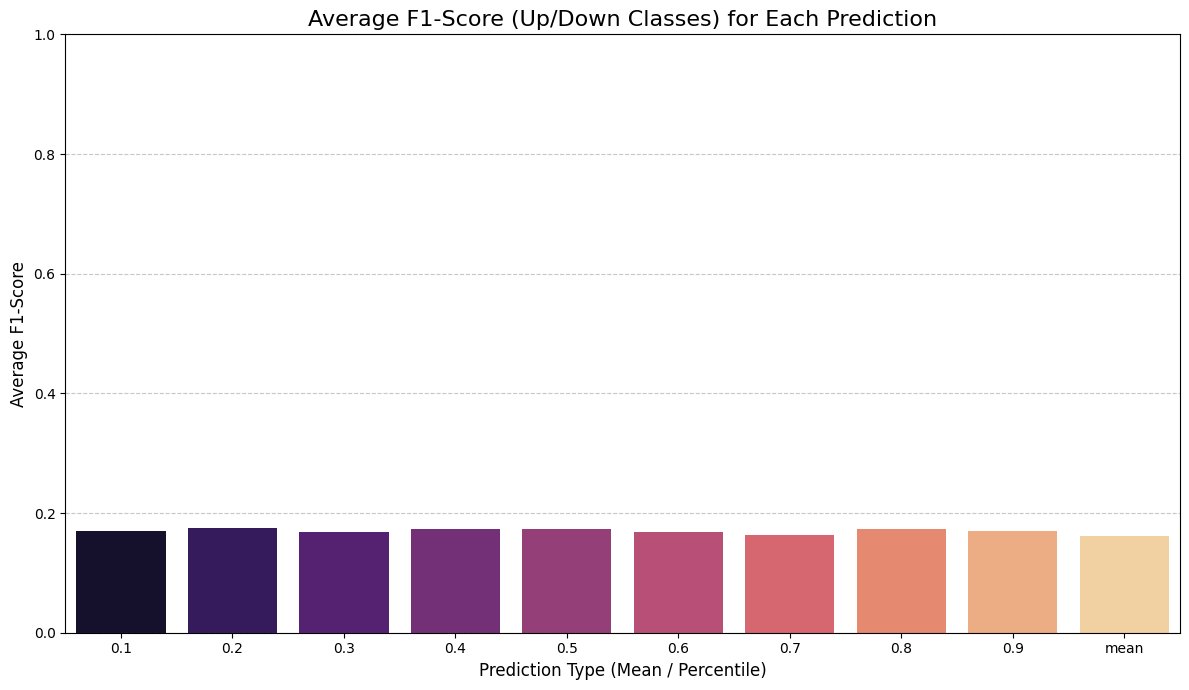

In [157]:
# 7. Compare F1-scores for Up/Down predictions across all predictions
f1_results = {}
y_true = binarized_df['actual_close']

# Columns to evaluate (mean and all percentiles)
cols_to_evaluate = [col for col in prediction_cols if col in binarized_df.columns]

for col in cols_to_evaluate:
    y_pred = binarized_df[col]
    # Get classification report as a dictionary
    report_dict = classification_report(y_true, y_pred, labels=[-1, 1],
                                        target_names=['Down', 'Up'],
                                        output_dict=True,
                                        zero_division=0)

    # Extract F1 scores for 'Down' and 'Up' classes
    f1_down = report_dict.get('Down', {}).get('f1-score', 0)
    f1_up = report_dict.get('Up', {}).get('f1-score', 0)

    # Calculate the average F1 score for these two classes
    avg_f1 = (f1_down + f1_up) / 2
    f1_results[col] = avg_f1

# Create a DataFrame for plotting
f1_df = pd.DataFrame(list(f1_results.items()), columns=['Prediction', 'Average_F1_Up_Down']).sort_values('Prediction')

# Plotting
plt.figure(figsize=(12, 7))
sns.barplot(data=f1_df, x='Prediction', y='Average_F1_Up_Down', palette='magma')
plt.title('Average F1-Score (Up/Down Classes) for Each Prediction', fontsize=16)
plt.xlabel('Prediction Type (Mean / Percentile)', fontsize=12)
plt.ylabel('Average F1-Score', fontsize=12)
plt.xticks(rotation=0)
plt.ylim(0, 1) # F1-score is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()